In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
camera = cv2.VideoCapture(0)

In [3]:
model_resnet = tf.keras.applications.ResNet50(include_top=False)

In [4]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

In [5]:
x = model_resnet.output

In [6]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [7]:
x = tf.keras.layers.Dense(50, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='sigmoid')(x) #Utilizar a softmax pois ela indica a probabilidade de determinada coisa pertencer a determinada classe
#AO contrato da sigmoid, que apenas mostra valores entre 0 e 1 e a propabilidade do item pertencer a classe 1 (positiva), e a classe 0 (negativa), por exemplo. uma lampada recebe 0 para desligada e 1 para ligada
#Se o valor referente a essa lampada for 0.789, significa que ela está ligada, já que ela está mais próxima de 1

In [8]:
model = tf.keras.models.Model(inputs=model_resnet.input, outputs=preds)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

In [10]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [11]:
for layer in model.layers[:175]:
    layer.trainable = False

In [12]:
for layer in model.layers[175:]:
    layer.trainable = True

In [13]:
i = 1
while i <= 10:
    ret, frame = camera.read()
    if not ret:
        print("Sem frame")
        break
    cv2.imshow("Imagem", frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        if i % 2 == 0:
            cv2.imwrite('dataset/teclado/foto{}.png'.format(i), frame)
        else:
            cv2.imwrite('dataset/mouse/foto{}.png'.format(i), frame)
        i += 1
camera.release()
cv2.destroyAllWindows()

In [14]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [15]:
image_dataset = train_datagen.flow_from_directory("H:/Python/MachineLearning/1/PROJETOS/OBJECT_DETECTION_WEBCAM/dataset",
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 class_mode='categorical')

Found 50 images belonging to 2 classes.


In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [17]:
model.fit(image_dataset, epochs=10)

Epoch 1/10
2/2 [==============================] - 7s 1s/step - loss: 1.1006 - accuracy: 0.5600
Epoch 2/10
2/2 [==============================] - 4s 1s/step - loss: 0.3033 - accuracy: 0.8400
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.0096 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.0062 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 4s 1s/step - loss: 8.2815e-04 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 3s 1s/step - loss: 4.4101e-04 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 3s 1s/step - loss: 2.4854e-04 - accuracy: 1.0000


In [25]:
image_test = tf.keras.preprocessing.image.load_img("C:/Users/josea/Pictures/Camera Roll/mouse.jpg", 
                                                  target_size=(224,224))

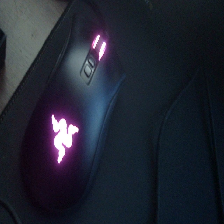

In [26]:
image_test

In [27]:
image_test_array = tf.keras.preprocessing.image.img_to_array(image_test)

In [28]:
image_test_array = np.expand_dims(image_test_array, axis=0)

In [29]:
image_test_array.shape

(1, 224, 224, 3)

In [30]:
image_test_preprocessing = tf.keras.applications.resnet50.preprocess_input(image_test_array)
image_test_preprocessing

array([[[[ -10.939003,  -28.779   ,  -36.68    ],
         [  -5.939003,  -18.779   ,  -31.68    ],
         [  -9.939003,  -18.779   ,  -36.68    ],
         ...,
         [ -78.939   ,  -97.779   , -111.68    ],
         [ -76.939   ,  -95.779   , -109.68    ],
         [ -76.939   ,  -95.779   , -109.68    ]],

        [[  -1.939003,  -23.779   ,  -34.68    ],
         [  -5.939003,  -24.779   ,  -36.68    ],
         [  -0.939003,  -17.779   ,  -29.68    ],
         ...,
         [ -75.939   ,  -94.779   , -108.68    ],
         [ -77.939   ,  -96.779   , -110.68    ],
         [ -79.939   ,  -98.779   , -112.68    ]],

        [[  -9.939003,  -23.779   ,  -40.68    ],
         [  -2.939003,  -18.779   ,  -30.68    ],
         [  -9.939003,  -24.779   ,  -32.68    ],
         ...,
         [ -80.939   ,  -99.779   , -113.68    ],
         [ -77.939   ,  -96.779   , -110.68    ],
         [ -75.939   ,  -94.779   , -108.68    ]],

        ...,

        [[ -66.939   ,  -89.779   , -1

In [31]:
predict = model.predict(image_test_preprocessing)
predict = np.argmax(predict)
dict = {0: "Mouse", 1:"Teclado"}
print("Este item é um: {}".format(dict[predict]))

1/1 [==============================] - 0s 155ms/step
Este item é um: Mouse
